## Introduction on Nonlinear Dynamics

**The fractal dimension**

When we talk about nonlinear signal analysis, we intend to describe any signal as a time-series generated by a chaotic dynamics or nonlinear dynamics (NLD). NLD is a generic term to describe any conservative system by a set of differential equations, whose time-course from time $t_0$ to time $t_1$ can be explored in a phase-space. The latter represents the set of all possible value the variables of the system can assume and it is described by a trajectory or curve in $(q,p)$ or $(x_1,x_2)$ cartesian space. $(q,p)$ are normally consider position or momentum variables and $(x_1,x_2)$ are state variables and they are highdimensional. The most interesting behavior of a system is the regime dynamics or $t \rightarrow \inf$. In particular, if the system reaches a subset of the potential phase-space and remains inside that subset, we speak about an attractor. It is possible that this subset is either a point or any other type of basin, whose geometrical shape can be described by integer dimension (such as a line). However, it is possible that they might have irregular or fractal shape and we then speak about strange attractors. The fractal basin or attractor has a geometrical dimension $d$ that is not an integer and can be always considered a geometry between a point or a line or a line and a surface. There are many ways to estimate $d$ and the most common way relies is known as box counting, which covers the phase space with D-dimensional cubes (see below). 

**Lypaunov exponents**

Attractor with a fractal basin is defined as a strange attractor, which is often considered a chaotic attractor. However, this might not be necessarily the case. If we consider two points at small distance $\Delta$ at $t=0$, they will move apart exponentially fast for increasing $t$, that is $\Delta(t) = \Delta(0)\exp(\lambda*t)$, where $\lambda$ is called Lyapunov exponent. In general, there are as many $\lambda$ as the number of state variables of the system and we can generally say that:
1. A system that has each $\lambda$ < 0 is stable 
2. A system that has each $\lambda$ > 0 is unstable and divergent
3. A system that has some $\lambda$ > 0 and the others $\lambda$ < 0 is chaotic. Due to the combination of positive and negative $\lambda$, the system is unpredictable (i.e. chaotic).

Strange attractor are often chaotic, meaning the fractal basin has an unpredictable dynamic. Although this is not always the case, we are going to assume that strange attractors are also chaotic.

**Dynamical systems and maps**

We normally refer to a dynamical system as a set of differential equations that describe the temporal dynamics of a set of variables $\mathbf{x}(t)$ as follows:

$$\mathbf{\dot{x}}(t)= G(\mathbf{x}(t),t),$$

where both the variables $\mathbf{x}(t)$ and the function $G(\mathbf{x}(t),t)$ depend on time $t$ in general. A map is discrete version of a dynamical system where the vector field $\mathbf{x}(t)$ depends on discrete and integer time value and therefore the map is an equation in the form of:

$$\mathbf{x}_{t+1}= F(\mathbf{x}_{t}),$$

where F represents the map function. In world of physiology, the underlying continous or discrete dynamics is unknown and we need a tool to estimate the phase-space of $F$ or $G$, as explained below. On top of that, one might want to apply the estimation of fractal dimension or lyapunov exponents or any other summary statistics features by validating their methodologies on dynamical systems whose properties are well-known (as it has been done in these tutorials).

**Takens's Theorem and the sample entropy**

Although linear methods are widespread in engineering science, natural systems are not well described by linearly interacting state variables or sum of indepedent frequencies in any possible case. However, the underlying dynamical system or map is unknown when we deal with biomedical signals. Therefore, one migth need to reconstruct the attractor basin of a (potential) strange attractor before you can actually assess the fractal dimension or the lyapunov exponents. By defining the time course of the vector space variables as a compact manifold M, we can reconstruct the flow $\phi$ on M of the underlying dynamical system by a delay embedding approach. If we consider only one observable y(t), one can estimate the flow $\phi$ as follows:
$$\phi = (y(t),y(t-\tau),y(t-2*\tau),...,y(t-N*\tau)),$$
where $\tau$ is a sufficient small lag and N is the estimated dimension or number of state variables of the underlyng phase space. This type of reconstruction is defined as a delay-embedded estimation and there are two paramters that have to be tuned: the $\tau$ and the dimension N. The interested readers can take a look at the references listed below to determine the dimension N and the lag $\tau$ 

The implications of the Takens's theorem are multiple:

1. The delay-embedding allows to estimate the fractal dimension by the distribution of lagged or delay-embedded vector X. This is not just a tool to replace box-counting, but it allows to retrieve the fractal dimension whenever the underlying system is unknown by simply investigating one observable.
2. The analysis of subequent increments, their deviation from fixed dynamics and its long-term persistence shows the inherent link between strange attractors and monofractal or long-memory signals such as the brownian motion
3. Since the Takens's theorem is the gateway to underlying phase-space dynamics, one can obtain the accumulated information or the information rate by computing the sample entropy of the investigated time-series

**References**

1. https://www.science.org/doi/abs/10.1126/science.238.4827.632
2.https://www.sciencedirect.com/science/article/abs/pii/0167278983902981
3. https://journals.aps.org/pre/abstract/10.1103/PhysRevE.53.5445
4. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0018295#pone.0018295-Takens1

**Packages for NLD**

Refer to the original pages of the two packages that are used in the tutorials for the assessement of NLD. The NOLDs package is a rather comprehensive toolbox to make estimate nonlinear dynamics properties, while the FATHON is a specific toolbox to estimate the Hurst exponent via the detrend fluctuation analysis. 

1. https://github.com/CSchoel/nolds
2. https://github.com/stfbnc/fathon

Whenever you use these packages, please cite the library webpage and the appropriate references

1. https://zenodo.org/record/3814723#.YVnDq2Yza3I
2. https://joss.theoj.org/papers/10.21105/joss.01828

## Import packages

In [1]:
import numpy as np
import scipy as sp
from src import py_msent
import matplotlib.pyplot as plt
import fathon
from fathon import fathonUtils as fu
import math
import os
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nolds
from IPython.display import Image
WD_PATH = os.path.dirname(os.getcwd())
print(WD_PATH)
separator    = ''
cantor_path = separator.join([WD_PATH,'/images/cantor_set.png'])
# Image(cantor_path)
print(cantor_path)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis
/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/images/cantor_set.png


## Cantor Set and Box Counting

Geometric shapes are normally considered to have an dimension set to an integer value: a point has zero-dimension, a line is one dimensional, a surface is two dimensional and volume is three dimensional. However, fractals are geometric shapes whose dimension is not an integer, but it is a floating point number. To compute the fractal dimension or the geometrical dimension of fractal, one can use the box counting method, which computes $D$ as:

$$D = \lim_{\epsilon \rightarrow 0} \frac{\log{N(\epsilon)}}{\log{1/\epsilon}},$$

where $N(\epsilon)$ is the number of n-dimensionsals cubes of size (edge length) $\epsilon$. In general, we can say that:

1. $D = 0$ for a point, since $N(\epsilon) = 1$ and $\epsilon = 1$
2. $D = 1$ for a line, since $N(\epsilon) = l/\epsilon$
3. $D = \log(2)/\log(3)$ for a cantor set (see below), since $N(\epsilon) = 2^n$ and $\epsilon = 3^{-n}$. Therefore, the cantor set can be said to have shape between a point and a line.

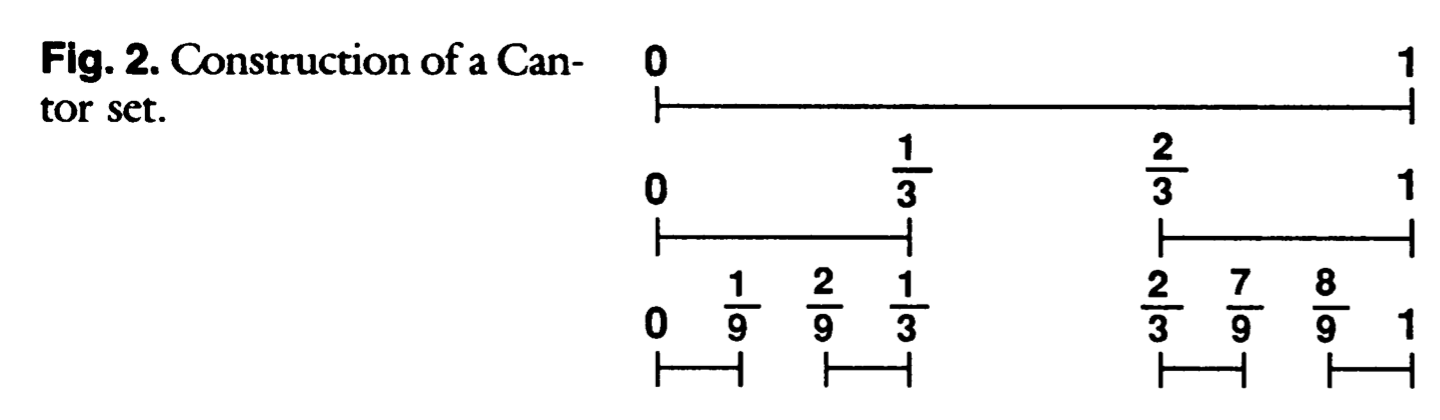

In [2]:
Image(cantor_path)

## Henon Map: Phase-space

The first example of strange attractor is a map studied by Henon (A map is an equation of the form $ x(t+1) = F(x(t)) $ , where the time $t$ is discrete and integer valued). The map is defined by the set of equations: 
$$ x_{t+1} = 1 - a * x_{t}^2 + y_{t} $$
$$ y_{t+1} = b * x_{t} $$.

After we defined these equations in the following code block, we can iterate them in a for loop and plot the results in a Phase-Space, which means plot the successive point $x$ vs $y$ of the Henon map equations.

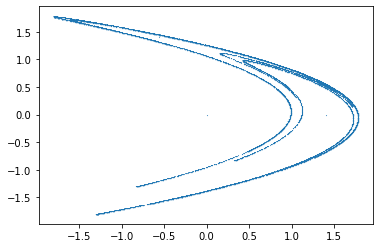

In [3]:
#python3
# import numpy as np 
# import matplotlib.pyplot as plt 
# plt.style.use('dark_background')

def henon_attractor(x, y, a=1.4, b=0.3):
    '''Computes the next step in the Henon 
    map for arguments x, y with kwargs a and
    b as constants.
    '''
    x_next = a - x ** 2 + b*y
    y_next = x
    return x_next, y_next
    
# number of iterations and array initialization
steps = 10000
X = np.zeros(steps + 1)
Y = np.zeros(steps + 1)

# starting point
X[0], Y[0] = 0, 0

# add points to array
for i in range(steps):
    x_next, y_next = henon_attractor(X[i], Y[i])
    X[i+1] = x_next 
    Y[i+1] = y_next

# plot figure
plt.plot(X, Y, '^', alpha = 0.8, markersize=0.3)
# plt.axis('off')
plt.show()
plt.close()

We noticed that Henon map is essentially a chaotic strange attractor. The enlargement shows a scale invariant Cantor-set structure on the linear border of the attractor space. Therefore, we should get a not-integer dimension if we compute it.

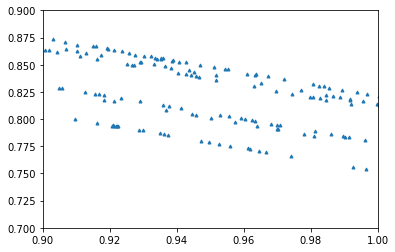

In [4]:
plt.plot(X, Y, '^', markersize=3)
plt.xlim([0.9,1.0])
plt.ylim([0.7,0.9])
# plt.axis('off')
plt.show()
plt.close()

## Correlation dimension 

The Henon map is a strange attractor as can be seen in the figure above. First, the dynamics of the system converges to a limited area in the phase space. On top of that, if we enlarge any zone of this limited region, we notice that trajectory follows a cantor set, which is fractal by definition. Therefore, the frontier of the Henon region contains a fractal stucture, which somehow enriches or make the border line more complex. Eventually, this trajectory should be something between a line and a surface and should have a dimension that is not an integer. 

Given the time-structure of the Henon map (and biological signals more in general) and thanks to Takens's theorem, we can rely on the correlation dimension, which can approximate the more appropriate box counting. The correlation integral is defined as:

$$ C(r) = \lim_{N \rightarrow \inf} \frac{1}{N} \sum_{ij}^{N} \theta(r-|\textbf{X}_i -\textbf{X}_j|) $$

where $\textbf{X}_i$ is the vector form of N-points of a long time-series of an attractor or its delay-embedded representation, $\theta$ is the heaviside function and $r$ is a tolerance parameter that defines the volume boundary for the match via $\theta$. In general, $C{r}$ follows a power-law:

$C(r) \approx r^\nu $

where $\nu$ is closer to the fractal dimension $D$ for the right embedded dimension. Therefore, one can estimate D by $C(r)$ by sweeping $r$ in a large enough range and compute $\nu$ as:

$$ \nu \approx \frac{\log{C(r)}}{\log{r}} $$

The slope $\nu$ is expected to be 1.21 according to Procaccia et al. 1983, while $D$ is 1.26.

In [5]:
sd_x= np.std(X, ddof=1)
rvals_vect = nolds.logarithmic_r(0.01 * sd_x, 1.0* sd_x, 1.03)
dim_corr,set_cr = nolds.corr_dim(X,emb_dim=2, rvals=rvals_vect, debug_data=True)

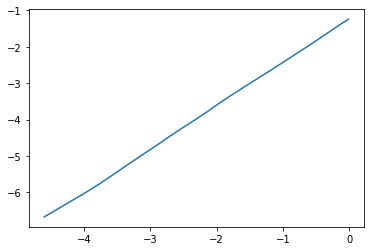

In [6]:
plt.plot(set_cr[0],set_cr[1])

In [7]:
print(dim_corr)

1.1985975064614829


## Lyapunov Exponents

Any chaotic attractor is sensitive to the initial conditions, which means that the two trajectories start very close to each other will rapidly diverge. 

(Figure)

It can be demonstrated that after a transient has elapsed and a trajectory has settled on, the norm of the separation vector $\delta(t)$ is:

$$\delta(t)=\delta_0\exp(\lambda*t)$$

The parameter $\lambda$ is the Lyapunov exponent and expresses the exponential divergence of the attractor. In general, there are n lyapunov exponents, as many as the n-dimension of the attractor.

Therefore, the henon map should have two lyapunov exponents as a two dimensional chaotic attractor. The fact that it is chaotic can be assessed by the fact the lyapunov exponents change sign: a stable system have all the exponents below zero, an unstable have all the exponents above zero and a chaotic have only the first set above zero.

In [8]:
nolds.lyap_r(X, emb_dim=2)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


0.35854110291465774

In [9]:
nolds.lyap_e(X, emb_dim=2, matrix_dim=2)

array([ 0.41779843, -1.5685444 ], dtype=float32)

## Sample Entropy

The sample entropy ($SampEn$) is considered the information rate of an attractor basin, a time series $x(t)$ or the more generic dynamical system. It shares some similarities with the correlation dimension since it is based on the computation of the delay-embedded vectors $\textbf{X}(t)$. The details how to compute the Sample Entropy can be found in:
1. https://journals.physiology.org/doi/full/10.1152/ajpheart.2000.278.6.H2039?rfr_dat=cr_pub++0pubmed&url_ver=Z39.88-2003&rfr_id=ori%3Arid%3Acrossref.org

In a nutshell, the sample entropy is the ratio between the count $A$ of the subsequent matches delay-embedded vectors of dimension $m+1$ and the $B$ of the subsequent matches delay-embedded vectors of dimension $m$. The match is defined by the tolerance $r$, which is normally 20% of the standard deviation of the signal. Therefore, the $SampEn$ requires to define the dimension $m$ and the lag $\tau$ for the Takens's embedding and the tolerance $r$. The $SampEn$ is then computed as $$SampEn(m, r, N) = - \log(\frac{A_{m+1}(r)}{B_{m}(r)}).$$

The similarities with correlation dimension made the $SampEn$ one of the most common index for NLD. In general, the $SampEn$ of a chaotic attractor is not zero (since there is complex information that reduces the matching probability), but it is not as high as pure stochastic process,such as white noise.



In [10]:
sd_x       = np.std(X, ddof=1)
nolds.sampen(X, emb_dim=2, tolerance= 0.2*sd_x)



0.45725338150423556

## Hurst exponent

**Hurst exponent and brownian motion**

We defined fractional Brownian motion (fBM) as a cumulative sum of sequence $\eta_i$, i.e. $B(t) = \sum^{t}_{i=0}\eta_i$, known also as random walk. The variable $\eta_i$ is considered an instantaneous increment and the sequence of increments is defined as fractional Guassian noise (fGn). The mean-square displacement of the fBm and its derivative (fGn) have the following asymptotic behavior:   
$$<|B(t) - B(t0)|>^2 \sim |t-t_0|^{2H} = |t-t_0|^{2-d}$$
where H is the Hurst Exponent and d is the geometrical dimension of the time series obtianed via box counting. The overlap between a generic $B(t)$ and a strange attractor varaible $x(t)$ is absolutely not trivial. However, by following section 4 in https://users.math.yale.edu/~bbm3/web_pdfs/112selfAffinity.pdf:

1. x(t) = diff(B(t)) or, more correctly, x(t) is a considered a fractional Gaussian noise. 
2. Strange-attractor state-variables and brownian motions are self-similar. It means that they repeat the same type of distribution at different time scales and therefore the dimension of the attractor basin can estimate by box-counts ("Russian dolls" boxes)
3. If $1<D<2$, one can obtain that $H = 2 - d$. However, if $D<1$, one can obtain $H = 1 - d/2$ (https://journals.aps.org/pre/abstract/10.1103/PhysRevE.53.5445). Therefore, in general, $H<1$.

However, the reader is invited to carefully overview all the necessary hypothesis before assuming the powerful, but yet risky overlap between Brownian motion and chaotic dynamics.

**The link between strange attractors and Hurst exponent** 

Random walks, such as fBM or fGN, are also known as monofractal and long-memory processes. The Hurst exponent is normally considered a NLD feature or fractality of the basin for the following reasons.

1. They are characterized by a slow-decaying autocorrelation function, which entails stationary increments that are controlled by the exponent H, similarly to the Lyapunov exponent. Interestingly, the two measures correlates --> https://www.sciencedirect.com/science/article/abs/pii/S0378437117308920?via%3Dihub
2. Random walks are scalable or self-similar signal and therefore the Hurst exponent can be estimated via R/S analysis, which is a box-counting method. That's why we speak about fractal dimension, monofractal dimension and self-similarity as synonims. --> https://users.math.yale.edu/~bbm3/web_pdfs/112selfAffinity.pdf 



**Detrend fluctuation analysis**

The DFA derives the Hurst exponent by means of the fluctuations function $F(n)$ , which is calculated as follows:
1. The cumulative process of the time series $x(t)$ is derived by summing the successive deviations from the mean $<x>$:
$Y(t) = \sum^t_{t'=1}(x(t') - <x>) $
2. The cumulative process $Y(t)$ is divided in non-overlapping windows of length $n$ for a total count of $N_n=\frac{N}{n}$, where $N$ is the length of $x(t)$.
3. In each interval, a polynomial trend $Y^{fit}_s(i)$ is then fitted for each interval $s$ of length $n$ (e.g. a linear trend ) and $F^2(n,s)=\sum^n_{i=1}[(Y((s-1)n+i))-Y^{fit}_{s}(i)]^2$
4. The fluctuation functions is then computed as: $$F^2(n)=[\frac{1}{N_n}\sum^{N_n}_{s=1}F^2(n,s)]^{1/2},$$ which is expected to scale as $n^H$, i.e. $F^2(n)\sim n^{H}$. Threfore, one can estimate $H$ by compute the slope of $F(n)$ in a log-log graph, i.e. $\log_2(F^2(n))\sim H\log_2{n}$.

In [11]:
nMin = 16
nMax = 2**12
nScales = 32
exponents = np.linspace(np.log2(nMin), np.log2(nMax), nScales)
scales = np.round(np.power(2.0, exponents)).astype(np.int64)
q_list = [-5, -3, -1, 1, 3, 5]

In [12]:
def get_idxs(vec, scales):
    idxs = []
    for s in scales:
        idxs.append(np.where(vec==s)[0][0])
    return idxs

In [13]:
def test_mat_dfa_lorenz(x):
    x_dfa = fathon.DFA(fu.toAggregated(x))
    n_w, F_w = x_dfa.computeFlucVec(scales, revSeg=False, polOrd=1)
    idxs = get_idxs(n_w, scales)
    n_w = n_w[idxs]
    F_w = F_w[idxs]
    H, _ = np.polyfit(np.log2(n_w), np.log2(F_w), 1)
    return H,n_w,F_w

In [14]:
H,n_w,F_w = test_mat_dfa_lorenz(X)
print(H)

0.3922972579746019


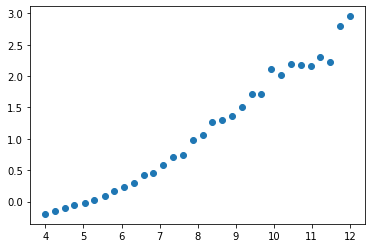

In [15]:
plt.scatter(np.log2(n_w), np.log2(F_w))

In [16]:
Hurst_corrdim = 1-dim_corr/2
print(Hurst_corrdim)

0.40070124676925856


Formula according with https://journals.aps.org/pre/abstract/10.1103/PhysRevE.53.5445.  